# 2a. 

A Support Vector Machine (SVM) is a supervised machine learning algorithm that can be used for both classification 
and regression tasks. SVM is particularly effective in high-dimensional spaces and is well-suited for problems 
where clear margins of separation exist between classes. 
SVM is a powerful, versatile, and popular machine learning model, capable of performing linear or nonlinear classification 
or regression even outliers detection. Suit for complex small or medium datasets. 
SVM is a family of classification rules that contain both parametric(e.g. linear) and nonparametric(e.g. Kernel based) methods. 
It can be viewed as a generalization of linear decision boundaries for classification. 
In particular, SVM produces nonlinear boundaries by constructing a linear boundary in a large, 
transformed version of the feature space.

Support Vector Machine (SVM) differs from other machine learning models mainly in its approach to class separation. 
SVM works by finding the optimal hyperplane that maximizes the margin between different classes in the feature space. 
SVMs can also handle both classification and regression problems, and utilize kernel functions to handle non-linear data. 
The main advantage of SVM is its ability to handle high-dimensional datasets, as well as its high tolerance for outliers. 
The SVM approach makes it possible to make better decisions in cases where the decision boundaries are not very clear, 
and the model can perform well even with relatively small datasets.

# 2b.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def rhombus_equation(x, a) :
    return a - abs(x)

# Membuat Dataset
x = np.linspace(-10.0, 10.0, 200)
a_value1 = 10
y = rhombus_equation(x, a_value1)
y = np.hstack([y, -y])
x = np.hstack([x, -x])

x1 = np.linspace(-9.0, 9.0, 200)
a_value2 = 50
y1 = rhombus_equation(5*x1, a_value2)
y1 = np.hstack([y1, -y1])
x1 = np.hstack([x1, -x1])

df1 = pd.DataFrame(np.vstack([y, x]).T, columns=['X1', 'X2'])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1, x1]).T, columns=['X1', 'X2'])
df2['Y'] = 1

# Menggabungkan dataset dengan menggunakan pd.concat
df = pd.concat([df1, df2], ignore_index=True)
df.head()

,X1,X2,Y
0,0.000000,-10.000000,0
1,0.100503,-9.899497,0
2,0.201005,-9.798995,0
3,0.301508,-9.698492,0
4,0.402010,-9.597990,0


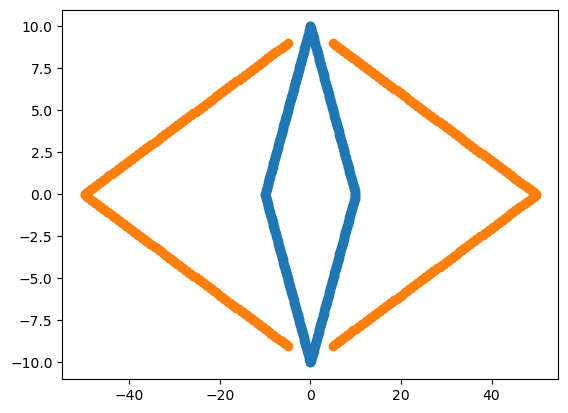

In [42]:
plt.scatter(y,x)
plt.scatter(y1,x1)

# 2c.

In [44]:
# Split dataset to training set dan test set

from sklearn.model_selection import train_test_split
X = df[['X1', 'X2']]
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
from sklearn.svm import SVC

linear1 = SVC(kernel='linear', C=1.0)
linear2 = SVC(kernel='linear', C=100.0)

linear1.fit(X_train, y_train)
linear2.fit(X_train, y_train)

y_pred_1 = linear1.predict(X_test)
y_pred_2 = linear2.predict(X_test)

from sklearn.metrics import classification_report
print('\nLinear Classification Report 1\n')
print(classification_report(y_test, y_pred_1))

print('\nLinear Classification Report 2\n')
print(classification_report(y_test, y_pred_2))


Linear Classification Report 1

              precision    recall  f1-score   support

           0       0.43      1.00      0.60        69
           1       0.00      0.00      0.00        91

    accuracy                           0.43       160
   macro avg       0.22      0.50      0.30       160
weighted avg       0.19      0.43      0.26       160


Linear Classification Report 2

              precision    recall  f1-score   support

           0       0.43      1.00      0.60        69
           1       0.00      0.00      0.00        91

    accuracy                           0.43       160
   macro avg       0.22      0.50      0.30       160
weighted avg       0.19      0.43      0.26       160



# 2d.

In [52]:
from sklearn.svm import SVC

rbf1 = SVC(kernel='rbf', C=1, gamma=0.1)
rbf2 = SVC(kernel='rbf', C=100.0, gamma=10)

rbf1.fit(X_train, y_train)
rbf2.fit(X_train, y_train)

y_pred_1 = rbf1.predict(X_test)
y_pred_2 = rbf2.predict(X_test)

from sklearn.metrics import classification_report
print('\nReport 1\n')
print(classification_report(y_test, y_pred_1))

print('\nReport 2\n')
print(classification_report(y_test, y_pred_2))


Report 1

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        91

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160


Report 2

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        91

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



# 2e.

![alt text](image-3.png)

![alt text](image-2.png)

# 2f. 
Best Model : 

The RBF Kernel models (both tuning types) performed significantly better than the Linear Kernel models. They achieved 100% accuracy, precision, recall, and F1-score across both classes, which indicates that the RBF Kernel was highly effective in classifying the data correctly.
This suggests that the RBF Kernel is capable of capturing the complex patterns in the dataset more effectively than the Linear Kernel. RBF, being a non-linear kernel, is better suited to data that is not linearly separable, which seems to be the case here.

Worst Model: 

The Linear Kernel models (both tuning types) performed poorly, with an accuracy of only 43%. The model had a recall of 1.0 for Class 0, meaning it correctly identified all instances of Class 0, but a recall of 0.0 for Class 1, failing to correctly identify any instances of Class 1. This imbalance indicates that the Linear Kernel could not handle the complexity of the data distribution.
Linear Kernel models are best suited for linearly separable data. The low performance here implies that the dataset likely has a non-linear decision boundary, making the Linear Kernel unsuitable.

However, the RBF Kernel is the best model for this dataset because it achieves perfect classification results, likely due to its ability to handle non-linear data. The Linear Kernel is the worst model in this case, as it struggles to classify one of the classes entirely, leading to low overall performance.
